In [4]:
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [5]:
import pandas as pd
from scipy.stats import poisson

In [83]:
df = pd.read_csv("/content/gdrive/MyDrive/Football Prediction/International_matches2.csv")

In [84]:
df

,HomeTeam,AwayTeam,Year,HomeGoals,AwayGoals,TotalGoals
0,France,Mexico,1930,4,1,5
1,Uruguay,Argentina,1930,4,2,6
2,Uruguay,Yugoslavia,1930,6,1,7
3,Argentina,United States,1930,6,1,7
4,Paraguay,Belgium,1930,1,0,1
...,...,...,...,...,...,...
4420,Costa Rica,Germany,2022,2,4,6
4421,Ghana,Uruguay,2022,0,2,2
4422,Korea Republic,Portugal,2022,2,1,3
4423,Serbia,Switzerland,2022,2,3,5


In [85]:
df.columns

Index(['HomeTeam', 'AwayTeam', 'Year', 'HomeGoals', 'AwayGoals', 'TotalGoals'], dtype='object')

In [86]:

df_home = df[["HomeTeam", "HomeGoals", 'AwayGoals']]
df_away = df[['AwayTeam', 'HomeGoals', 'AwayGoals']]

df_home = df_home.rename(columns={"HomeTeam":'Team', 'HomeGoals': 'GoalsScored', 'AwayGoals': 'GoalsConceded'})
df_away = df_away.rename(columns={'AwayTeam':'Team', 'HomeGoals': 'GoalsConceded', 'AwayGoals': 'GoalsScored'})

df_team_strength = pd.concat([df_home, df_away], ignore_index=True).groupby(['Team']).mean()
df_team_strength


,GoalsScored,GoalsConceded
Team,,
Afghanistan,0.888889,1.722222
Albania,1.100000,1.175000
Algeria,1.887097,0.838710
American Samoa,2.000000,7.000000
Andorra,0.488372,1.930233
...,...,...
Yemen,0.285714,2.380952
Yugoslavia,1.666667,1.272727
Zaire,0.000000,4.666667


In [87]:
def predict_points(home, away):
    if home in df_team_strength.index and away in df_team_strength.index:
        # goals_scored * goals_conceded
        lamb_home = df_team_strength.at[home,'GoalsScored'] * df_team_strength.at[away,'GoalsConceded']
        lamb_away = df_team_strength.at[away,'GoalsScored'] * df_team_strength.at[home,'GoalsConceded']
        prob_home, prob_away, prob_draw = 0, 0, 0
        for x in range(0,11): #number of goals home team
            for y in range(0, 11): #number of goals away team
                p = poisson.pmf(x, lamb_home) * poisson.pmf(y, lamb_away)
                if x == y:
                    prob_draw += p
                elif x > y:
                    prob_home += p
                else:
                    prob_away += p
        
        points_home = 3 * prob_home + prob_draw
        points_away = 3 * prob_away + prob_draw
        return (points_home, points_away)
    else:
        return (0, 0)


In [88]:
print(predict_points('England', 'United States'))
print(predict_points('Argentina', 'Mexico'))
print(predict_points('Qatar (H)', 'Ecuador')) 

(2.6035110667147427, 0.29191880641545465)
(1.9843426192174765, 0.8179799575684575)
(0, 0)


In [52]:
df_fixture =pd.read_csv("/content/gdrive/MyDrive/Football Prediction/Fixture.csv")

In [53]:
df_fixture

,home,score,away,year
0,Netherlands,Match 49,USA,2022
1,Argentina,Match 50,Australia,2022
2,France,Match 52,Poland,2022
3,England,Match 51,Senegal,2022
4,Japan,Match 53,Croatia,2022
5,Brazil,Match 54,Korea Republic,2022
6,Morocco,Match 55,Spain,2022
7,Portugal,Match 56,Switzerland,2022
8,Winners Match 53,Match 58,Winners Match 54,2022
9,Winners Match 49,Match 57,Winners Match 50,2022


In [54]:

def get_winner(df_fixture_updated):
    for index, row in df_fixture_updated.iterrows():
        home, away = row['home'], row['away']
        points_home, points_away = predict_points(home, away)
        if points_home > points_away:
            winner = home
        else:
            winner = away
        df_fixture_updated.loc[index, 'winner'] = winner
    return df_fixture_updated



In [55]:
df_fixture

,home,score,away,year
0,Netherlands,Match 49,USA,2022
1,Argentina,Match 50,Australia,2022
2,France,Match 52,Poland,2022
3,England,Match 51,Senegal,2022
4,Japan,Match 53,Croatia,2022
5,Brazil,Match 54,Korea Republic,2022
6,Morocco,Match 55,Spain,2022
7,Portugal,Match 56,Switzerland,2022
8,Winners Match 53,Match 58,Winners Match 54,2022
9,Winners Match 49,Match 57,Winners Match 50,2022


In [56]:
get_winner(df_fixture)

,home,score,away,year,winner
0,Netherlands,Match 49,USA,2022,USA
1,Argentina,Match 50,Australia,2022,Argentina
2,France,Match 52,Poland,2022,France
3,England,Match 51,Senegal,2022,England
4,Japan,Match 53,Croatia,2022,Japan
5,Brazil,Match 54,Korea Republic,2022,Brazil
6,Morocco,Match 55,Spain,2022,Spain
7,Portugal,Match 56,Switzerland,2022,Portugal
8,Winners Match 53,Match 58,Winners Match 54,2022,Winners Match 54
9,Winners Match 49,Match 57,Winners Match 50,2022,Winners Match 50


In [75]:
df_fixture_quarter =df_fixture[8:12].copy()
df_fixture_semi=df_fixture[12:14].copy()
df_fixture_final=df_fixture[14:].copy()

In [76]:
def update_table(df_fixture_round_1, df_fixture_round_2):
    for index, row in df_fixture_round_1.iterrows():
        winner = df_fixture_round_1.loc[index, 'winner']
        match = df_fixture_round_1.loc[index, 'score']
        df_fixture_round_2.replace({f'Winners {match}':winner}, inplace=True)
    df_fixture_round_2['winner'] = '?'
    return df_fixture_round_2


In [77]:
update_table(df_fixture, df_fixture_quarter)

,home,score,away,year,winner
8,Japan,Match 58,Brazil,2022,?
9,USA,Match 57,Argentina,2022,?
10,Spain,Match 60,Portugal,2022,?
11,England,Match 59,France,2022,?


In [78]:
get_winner(df_fixture_quarter)

,home,score,away,year,winner
8,Japan,Match 58,Brazil,2022,Brazil
9,USA,Match 57,Argentina,2022,USA
10,Spain,Match 60,Portugal,2022,Portugal
11,England,Match 59,France,2022,England


In [79]:
update_table(df_fixture_quarter, df_fixture_semi)

,home,score,away,year,winner
12,USA,Match 61,Brazil,2022,?
13,England,Match 62,Portugal,2022,?


In [80]:
get_winner(df_fixture_semi)

,home,score,away,year,winner
12,USA,Match 61,Brazil,2022,Brazil
13,England,Match 62,Portugal,2022,England


In [81]:
update_table(df_fixture_semi, df_fixture_final)

,home,score,away,year,winner
14,Brazil,Match 64,England,2022,?


In [82]:
get_winner(df_fixture_final)

,home,score,away,year,winner
14,Brazil,Match 64,England,2022,Brazil


This is the result of the Prediction Of the Knockouts stages of Fifa World Cup Qatar 2022.

According to our Prediction, **Brazil will be the Champion**.

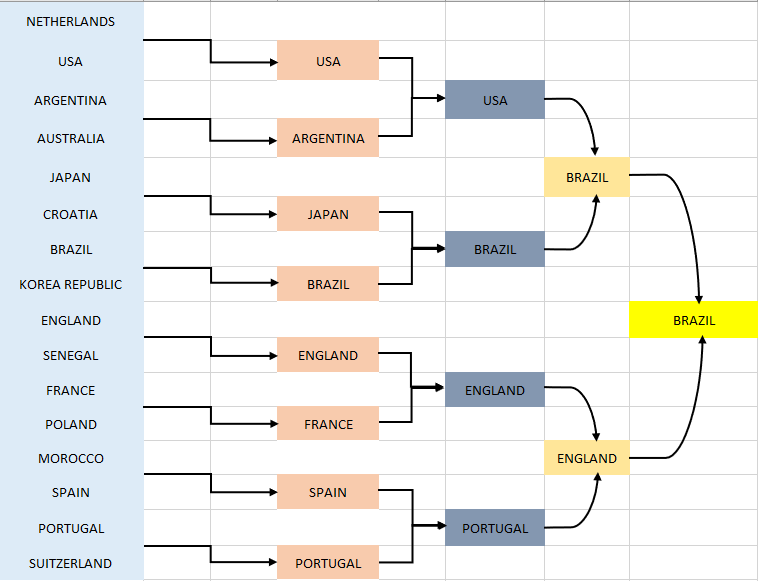

This Project is done by **Sanmoy Dam** & **Arka Prabha Chakrabarty**.